# TODO



*   Falta rever a aula online da Raquel para entender do que ela está falando. Só pelo os slides do capítulo 5 é impossível
*   DLT
*   RANSAC
*   SIFT
*   SURF




In [2]:
#@title Preparando as bibliotecas
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import imutils
#import plotly.express as px
%matplotlib inline
print(cv.__version__)

4.8.0


Neste exemplo, temos que descompactar a pasta 'imagens.zip' para poder utilizar o código em sua total extensão.

# 5.0 Homografia

-- gerado pelo chatgpt

A homografia em visão computacional é um conceito que se refere à relação geométrica entre dois planos de imagem. Em termos simples, podemos pensar nisso como uma transformação que mapeia pontos de uma imagem para pontos correspondentes em outra imagem.

Imagine que você está olhando para um objeto em uma foto e quer saber a localização desse objeto em outra foto. A homografia pode ser usada para encontrar essa correspondência, levando em consideração a perspectiva e a posição relativa das câmeras que tiraram as fotos.

A homografia é calculada usando pontos de correspondência entre as duas imagens. Esses pontos são escolhidos manualmente ou por meio de algoritmos de correspondência automática. Com base nesses pontos, a homografia é calculada para encontrar uma matriz de transformação que mapeia os pontos de uma imagem para os pontos correspondentes na outra imagem.

Uma vez que a homografia é estimada, ela pode ser usada para várias aplicações em visão computacional, como a sobreposição de imagens, a retificação de imagens para remover distorções de perspectiva e a reconstrução tridimensional de objetos.

Em resumo, a homografia em visão computacional é uma técnica que permite encontrar correspondências entre pontos em diferentes imagens, levando em consideração a perspectiva e a posição relativa das câmeras. Isso pode ser usado para várias aplicações, como sobreposição de imagens e reconstrução tridimensional.

## Algoritmos

### RANSAC

[Documentação do OpenCV](https://docs.opencv.org/4.8.0/d1/de0/tutorial_py_feature_homography.html)

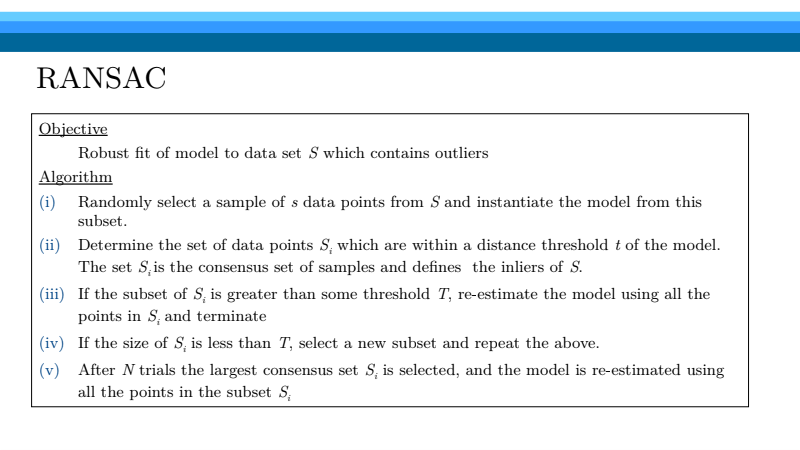

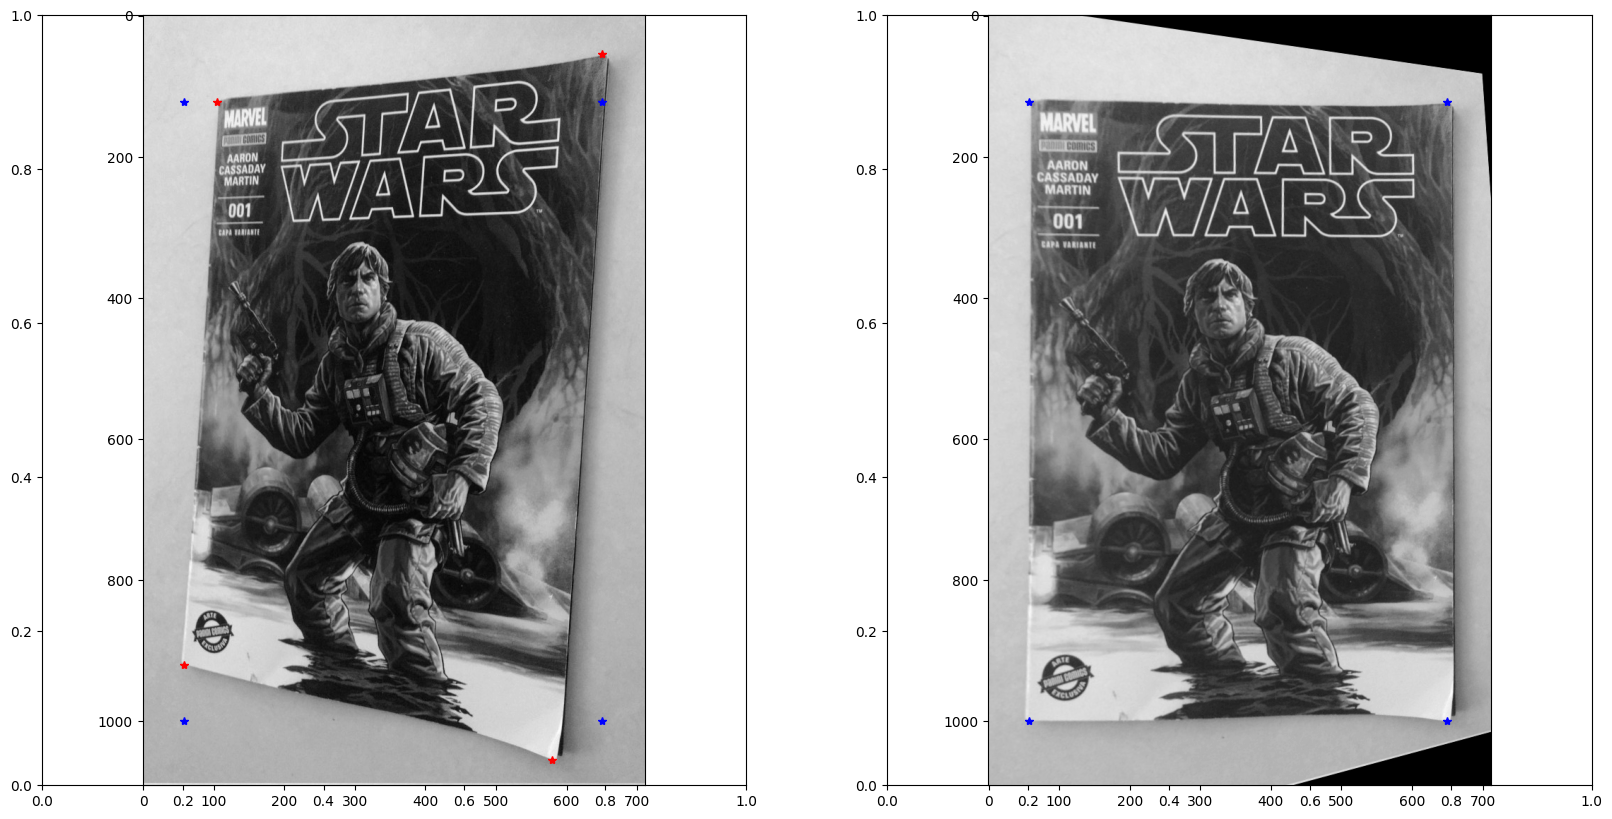

In [5]:
#@title Mostrando os pontos do canto e utilizando RANSAC (retificando documento ?)


#MIN_MATCH_COUNT = 10
img1 = cv.imread('comicsStarWars02.jpg',0) # queryImage
#img2 = cv.imread('comicsStarWars01.jpg',0) # trainImage


corners_img1 = np.array([[105,123],[650,55],[580,1055],[58,920]])
corners_img2 = np.array([[58,123],[650,123],[650,1000],[58,1000]])

src_pts = np.float32(corners_img1)
dst_pts = np.float32(corners_img2)

# Chamando o openCV para fazer a homografia com RANSAC
M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
img4 = cv.warpPerspective(img1, M, (img1.shape[1],img1.shape[0])) #, None) #, flags[, borderMode[, borderValue]]]]	)


fig, axs = plt.subplots(1,2,figsize=(20,10))
ax1 = fig.add_subplot(1,2,1)
plt.imshow(img1, 'gray')
plt.plot(corners_img2[:,0],corners_img2[:,1],'*b')
plt.plot(corners_img1[:,0],corners_img1[:,1],'*r')
ax2 = fig.add_subplot(1,2,2)
plt.imshow(img4,'gray')
plt.plot(corners_img2[:,0],corners_img2[:,1],'*b')
plt.show()

# 5.1 - Aplicações de Homografia

# SIFT Feature Detector

In [6]:
# Read image

img0 = cv.imread('mesa_livro01.jpg')


# Convert to gray scale
gray= cv.cvtColor(img0,cv.COLOR_BGR2GRAY)
rgb = cv.cvtColor(img0, cv.COLOR_BGR2RGB)

# Creat sift object
#sift = cv.xfeatures2d.SIFT_create()
sift = cv.SIFT_create()

# Use SIFT to detect keypoints and return their descriptors
#kp = sift.detect(gray,None)
kp, des = sift.detectAndCompute(gray,None)

# Draw keypoints on the image
img=cv.drawKeypoints(gray,kp,img0,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# Save an image with the keypoints
cv.imwrite('sift_keypoints.jpg',img)

# Open a window and show the detected keypoints
fig = plt.figure(figsize=(30,50))
plt.imshow(rgb)
fig = plt.figure(figsize=(30,50))
plt.imshow(img)
plt.show()



error: ignored

#Matching features using Brute Force (BF)

In [7]:


img1 = cv.imread('minions01a.jpg',0) # queryImage
img2 = cv.imread('minions02a.jpg',0) # trainImage

img1 = imutils.rotate_bound(img1,90)
img2 = imutils.rotate_bound(img2, 90)

# Initiate SIFT detector
#sift = cv.xfeatures2d.SIFT_create()
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]


draw_params = dict(matchColor = (0,0,255),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)


# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

fig = plt.figure(figsize=(30,50))
plt.imshow(imutils.rotate_bound(img3,-90))
plt.show()


Output hidden; open in https://colab.research.google.com to view.

# FLANN Matcher

FLANN stands for Fast Library for Approximate Nearest Neighbors.
It contains a collection of algorithms optimized for fast nearest neighbor search in large datasets and for high dimensional features. It works faster than BFMatcher for large datasets.

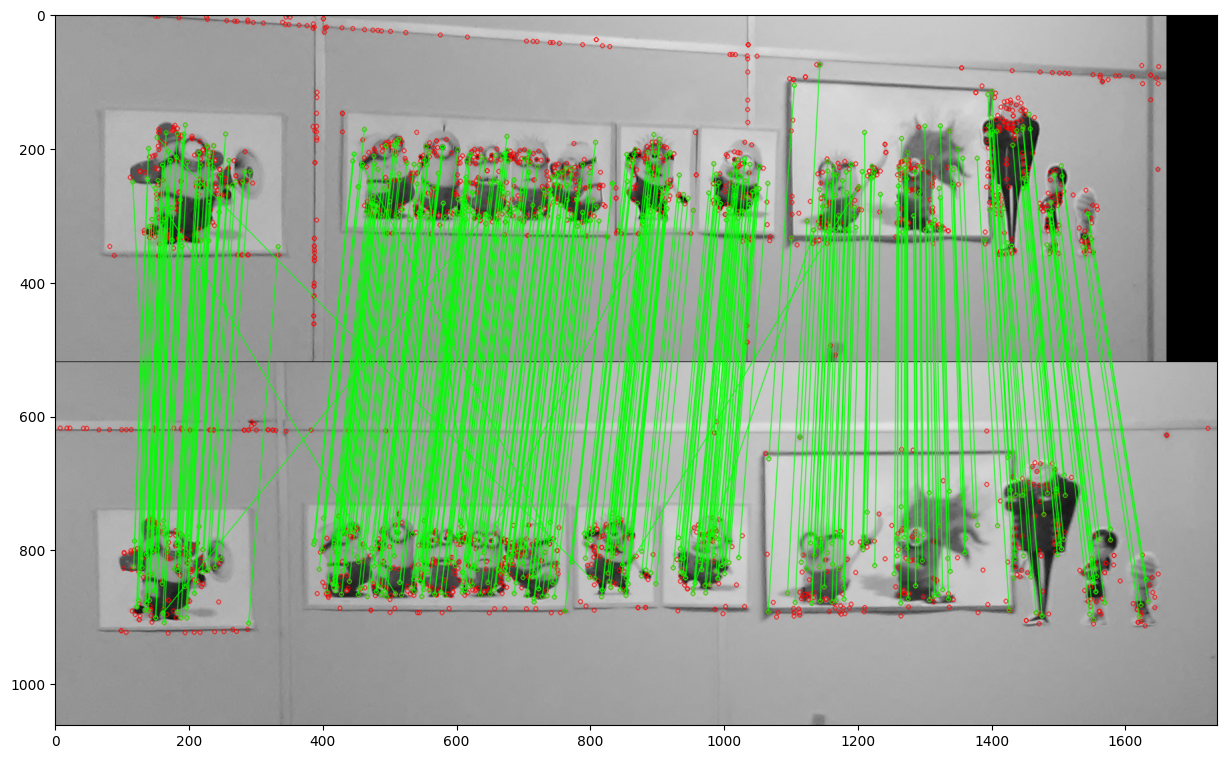

(<matplotlib.image.AxesImage at 0x7f18649e79d0>, None)

In [ ]:

img1 = cv.imread('minions01a.jpg',0)          # queryImage
img2 = cv.imread('minions02a.jpg',0) # trainImage

img1 = imutils.rotate_bound(img1,90)
img2 = imutils.rotate_bound(img2, 90)


# Initiate SIFT detector
#sift = cv.xfeatures2d.SIFT_create()
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
# FLANN stands for Fast Library for Approximate Nearest Neighbors.
# It contains a collection of algorithms optimized for fast nearest neighbor
# search in large datasets and for high dimensional features.
# It works faster than BFMatcher for large datasets.
# The variable index_params specifies the algorithm to be used, its related parameters etc.
# For algorithms like SIFT, SURF etc. you can pass following:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
# The variable search_params specifies the number of times the trees in the index should
# be recursively traversed. Higher values gives better precision, but also takes more time.
#search_params = dict(checks=50)   # or pass empty dictionary
search_params = dict()


flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
fig = plt.figure(figsize=(15,50))
plt.imshow(imutils.rotate_bound(img3, -90)),plt.show()

#Using SIFT and Homography to find an object in an image

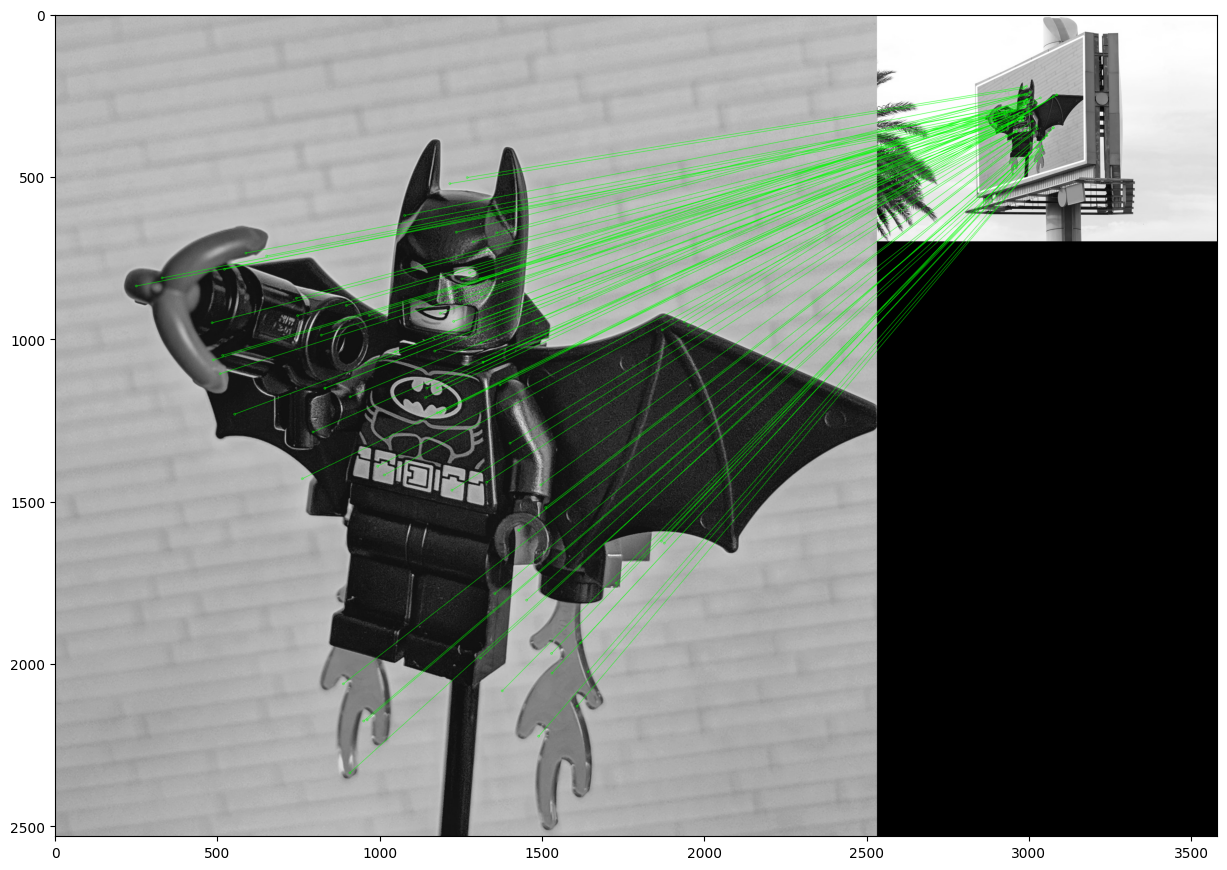

In [ ]:

MIN_MATCH_COUNT = 10
img1a = cv.imread('batman.jpg')          # queryImage
img1= cv.cvtColor(img1a,cv.COLOR_BGR2GRAY)
img2a = cv.imread('outdoor_batman.jpg') # trainImage
img2= cv.cvtColor(img2a,cv.COLOR_BGR2GRAY)

#img1 = imutils.rotate_bound(img1,180)

# Initiate SIFT detector
#sift = cv.xfeatures2d.SIFT_create()
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT

kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN stands for Fast Library for Approximate Nearest Neighbors.
# It contains a collection of algorithms optimized for fast nearest neighbor
# search in large datasets and for high dimensional features.
# It works faster than BFMatcher for large datasets.
# The variable index_params specifies the algorithm to be used, its related parameters etc.
# For algorithms like SIFT, SURF etc. you can pass following:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
# The variable search_params specifies the number of times the trees in the index should
# be recursively traversed. Higher values gives better precision, but also takes more time.
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)


# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append(m)



if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    #h,w,d = img1.shape
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
fig = plt.figure(figsize=(15,30))
plt.imshow(img3, 'gray')
plt.show()

#Using SIFT to estimate Homography between images and to warp the first image

In [8]:

MIN_MATCH_COUNT = 10
img1 = cv.imread('monalisa01_1.jpg',0)          # queryImage
img2 = cv.imread('monalisa02.jpg',0) # trainImage

#img1 = imutils.rotate_bound(img1,180)

# Initiate SIFT detector
#sift = cv.xfeatures2d.SIFT_create()
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT

kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)


# FLANN stands for Fast Library for Approximate Nearest Neighbors.
# It contains a collection of algorithms optimized for fast nearest neighbor
# search in large datasets and for high dimensional features.
# It works faster than BFMatcher for large datasets.
# The variable index_params specifies the algorithm to be used, its related parameters etc.
# For algorithms like SIFT, SURF etc. you can pass following:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
# The variable search_params specifies the number of times the trees in the index should
# be recursively traversed. Higher values gives better precision, but also takes more time.
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
#bf = cv.BFMatcher()
#matches = bf.knnMatch(des1,des2,k=2)plt.imshow(img3, 'gray')



# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append(m)



if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    img4 = cv.warpPerspective(img1, M, (img2.shape[1],img2.shape[0])) #, None) #, flags[, borderMode[, borderValue]]]]	)

else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)


fig = plt.figure()
fig, axs = plt.subplots(2,2,figsize=(30,15))
ax1 = fig.add_subplot(2,2,1)
plt.imshow(img3, 'gray')
ax1 = fig.add_subplot(2,2,2)
plt.title('First image')
plt.imshow(img1,'gray')
ax1 = fig.add_subplot(2,2,3)
plt.title('Second image')
plt.imshow(img2,'gray')
ax1 = fig.add_subplot(2,2,4)
plt.title('First image after transformation')
plt.imshow(img4,'gray')
plt.show()

error: ignored